# NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline', ylabel='count'>

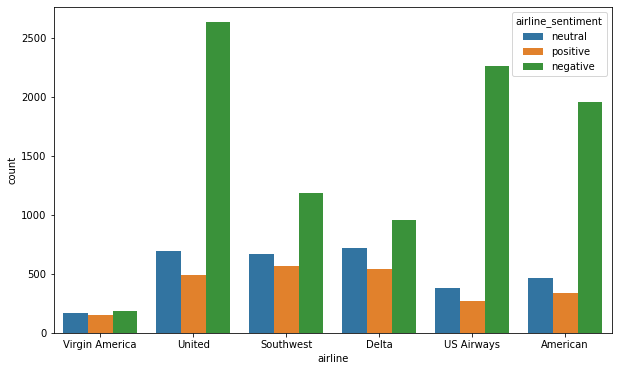

In [3]:
sns.countplot(data = df, x ="airline", hue = "airline_sentiment")

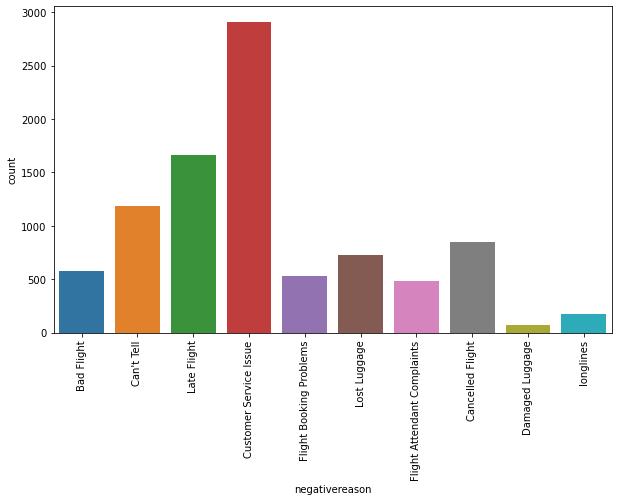

In [4]:
sns.countplot(data =df, x ="negativereason")
plt.xticks(rotation =90);

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

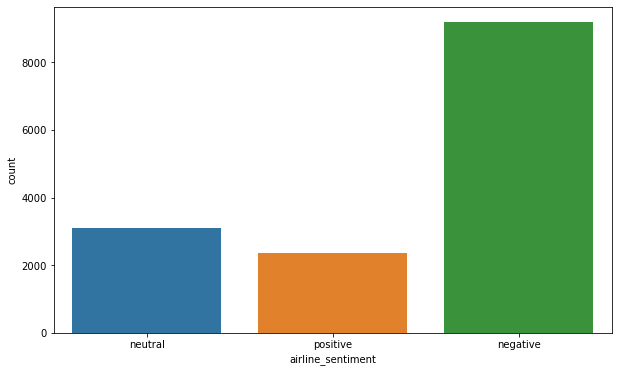

In [5]:
sns.countplot(data =df, x = "airline_sentiment")

In [6]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [7]:
df2 = df.copy()

In [8]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [9]:
df2["text"] = df2["text"].apply(lambda x: pd.Series(x).str.replace("(@+\w+)", ""))
df2["text"].head()

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: text, dtype: object

## Cleaning Data

In [10]:
#nltk.download('stopwords')

In [11]:
#nltk.download('wordnet')

In [12]:
stop_words = stopwords.words('english')

In [13]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [14]:
" I don't like".replace("'", "")

' I dont like'

In [15]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"].head()

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Removing Rare Words

In [16]:
" ".join(df2["text"]).split()

['said',
 'plus',
 'youve',
 'added',
 'commercial',
 'experience',
 'tacky',
 'didnt',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guest',
 'face',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seat',
 'didnt',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hat',
 'parody',
 'http',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'youre',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teen',
 'lt',
 'pretty',
 'graphic',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'trip',
 'amp',
 'havent',
 'even',
 'gone',
 'trip',
 'yet',
 'p',
 'im',
 'flying',
 'fabulous',
 'seductiv

In [17]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

flight                    4544
get                       1374
http                      1210
hour                      1138
thanks                    1078
                          ... 
installed                    1
brussels                     1
don                          1
lookforwardtoflywithaa       1
contentmarketing             1
Length: 9881, dtype: int64

In [18]:
rare_words = rare_words[rare_words < 2]

In [108]:
rare_words

pad                       1
amirite                   1
icloud                    1
thanksdc                  1
greatly                   1
                         ..
installed                 1
brussels                  1
don                       1
lookforwardtoflywithaa    1
contentmarketing          1
Length: 4837, dtype: int64

In [19]:
rare_words.index

Index(['pad', 'amirite', 'icloud', 'thanksdc', 'greatly', 'weaktea', 'enforce',
       'studying', 'jetbluehatesbtv', 'mental',
       ...
       'reflection', 'secondly', 'wore', 'professionalism', 'smelly',
       'installed', 'brussels', 'don', 'lookforwardtoflywithaa',
       'contentmarketing'],
      dtype='object', length=4837)

In [20]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()

0                                                 said
1               plus youve added commercial experience
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Features and Label

In [21]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercial experience
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df2["text"]
y= df2["airline_sentiment"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [27]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,aadv,aadvantage,aafail,abandoned,abc,ability,able,aboard,abq,abroad,absolute,absolutely,absurd,abt,abused,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,...,yesterday,yet,yikes,yo,york,youareonyourown,youd,youll,young,younger,youre,yousuck,youth,youve,yr,yuck,yuma,yummy,yup,yvonne,yvr,yyz,zero,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [29]:
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score

In [30]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model,X_test, y_test)

## Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [32]:
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      1836
     neutral       0.63      0.46      0.53       620
    positive       0.72      0.69      0.71       472

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.76      0.77      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.93      0.89      7342
     neutral       0.77      0.60      0.67      2479
    positive       0.83      0.79      0.81      1891

    accuracy                           0.84     11712
   macro avg       0.82      0.77      0.79     11712
weighted avg       0.83      0.84      0.83     11712



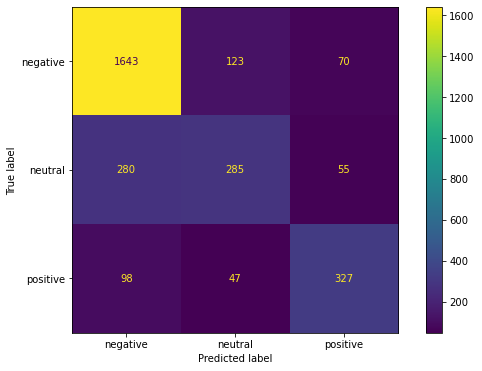

In [33]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

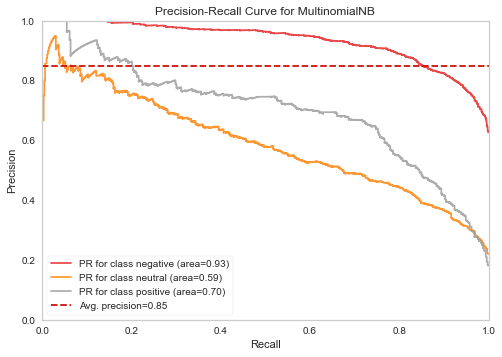

In [34]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [35]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = viz.score_["negative"]

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.75      0.96      0.84      1836
     neutral       0.67      0.28      0.40       620
    positive       0.75      0.51      0.61       472

    accuracy                           0.74      2928
   macro avg       0.72      0.58      0.62      2928
weighted avg       0.73      0.74      0.71      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      7342
     neutral       0.76      0.33      0.46      2479
    positive       0.80      0.51      0.62      1891

    accuracy                           0.76     11712
   macro avg       0.77      0.60      0.64     11712
weighted avg       0.76      0.76      0.73     11712



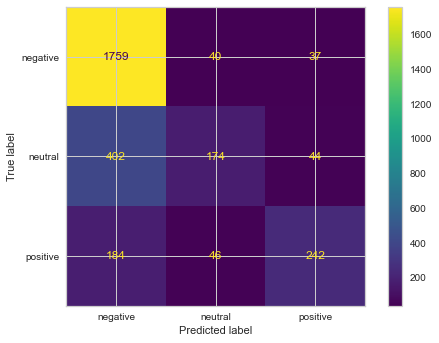

In [37]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

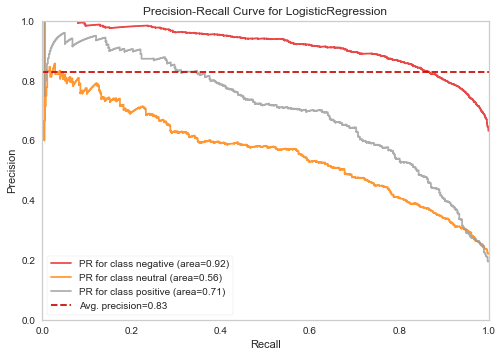

In [38]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [39]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = viz.score_["negative"]

In [40]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.71      0.80      1836
     neutral       0.47      0.71      0.56       620
    positive       0.64      0.71      0.67       472

    accuracy                           0.71      2928
   macro avg       0.67      0.71      0.68      2928
weighted avg       0.76      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.92      0.74      0.82      7342
     neutral       0.52      0.78      0.62      2479
    positive       0.67      0.75      0.71      1891

    accuracy                           0.75     11712
   macro avg       0.70      0.76      0.72     11712
weighted avg       0.80      0.75      0.76     11712



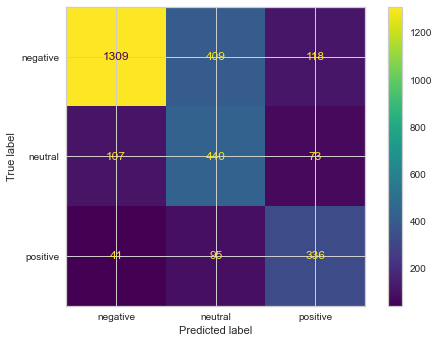

In [41]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

## SVM

In [113]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1836
     neutral       0.69      0.39      0.50       620
    positive       0.75      0.62      0.68       472

    accuracy                           0.77      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.76      0.77      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.81      0.96      0.88      7342
     neutral       0.79      0.49      0.60      2479
    positive       0.81      0.63      0.71      1891

    accuracy                           0.81     11712
   macro avg       0.80      0.69      0.73     11712
weighted avg       0.81      0.81      0.79     11712



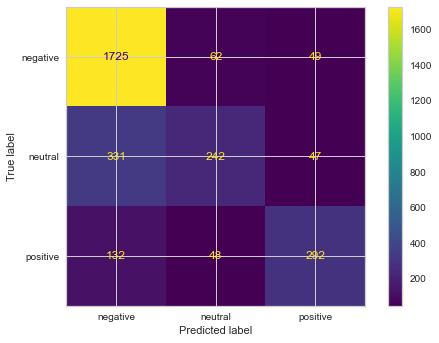

In [114]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

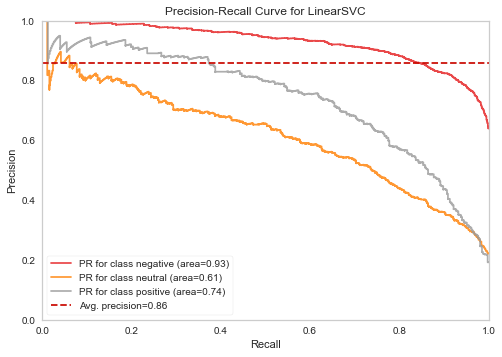

In [44]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [45]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = viz.score_["negative"]

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

KNN MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.42      0.57      1836
     neutral       0.28      0.75      0.41       620
    positive       0.65      0.53      0.58       472

    accuracy                           0.51      2928
   macro avg       0.59      0.57      0.52      2928
weighted avg       0.70      0.51      0.54      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.90      0.56      0.69      7342
     neutral       0.36      0.84      0.51      2479
    positive       0.70      0.53      0.61      1891

    accuracy                           0.61     11712
   macro avg       0.66      0.64      0.60     11712
weighted avg       0.76      0.61      0.64     11712



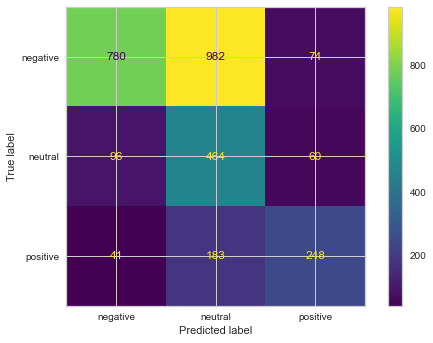

In [47]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

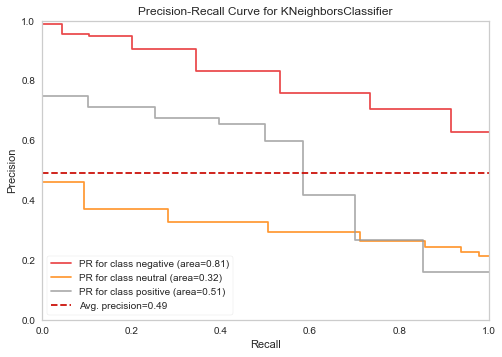

In [48]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [49]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = viz.score_["negative"]

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1836
     neutral       0.79      0.11      0.20       620
    positive       0.79      0.41      0.54       472

    accuracy                           0.71      2928
   macro avg       0.76      0.50      0.52      2928
weighted avg       0.73      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7342
     neutral       0.97      0.19      0.32      2479
    positive       0.94      0.59      0.72      1891

    accuracy                           0.76     11712
   macro avg       0.88      0.59      0.63     11712
weighted avg       0.82      0.76      0.71     11712



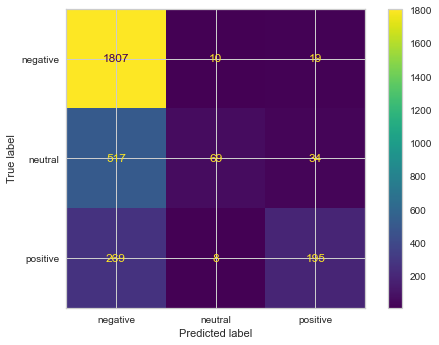

In [51]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

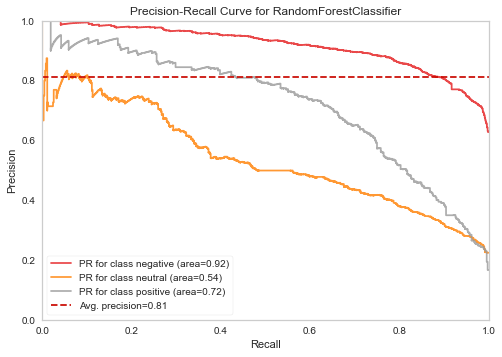

In [52]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [53]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = viz.score_["negative"]

In [54]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.78      0.82      1836
     neutral       0.49      0.66      0.57       620
    positive       0.68      0.67      0.67       472

    accuracy                           0.74      2928
   macro avg       0.68      0.70      0.69      2928
weighted avg       0.76      0.74      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.98      0.84      0.91      7342
     neutral       0.63      0.93      0.75      2479
    positive       0.87      0.82      0.84      1891

    accuracy                           0.85     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.85      0.86     11712



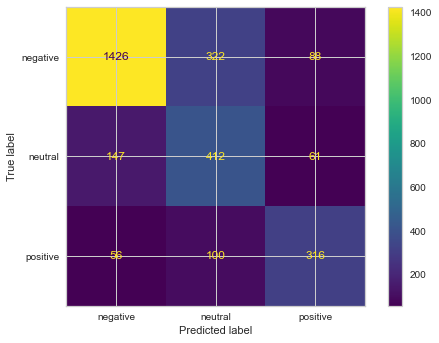

In [55]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

## Ada Boost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.83      0.84      0.84      1836
     neutral       0.54      0.54      0.54       620
    positive       0.68      0.66      0.67       472

    accuracy                           0.75      2928
   macro avg       0.68      0.68      0.68      2928
weighted avg       0.75      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      7342
     neutral       0.62      0.61      0.62      2479
    positive       0.78      0.72      0.75      1891

    accuracy                           0.80     11712
   macro avg       0.76      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



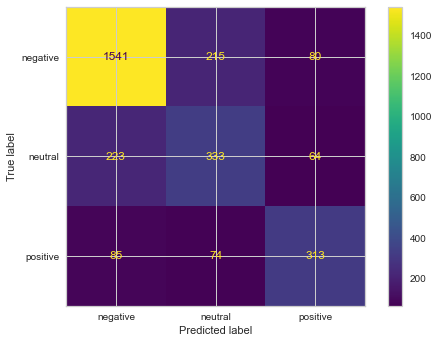

In [57]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

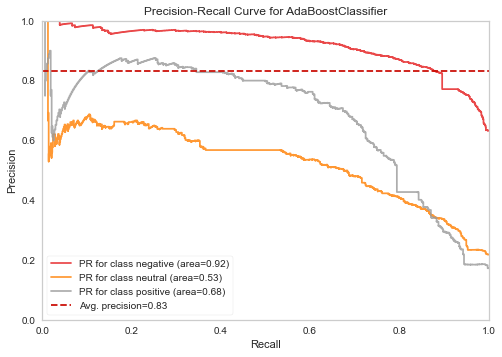

In [58]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [59]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = viz.score_["negative"]

## TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [62]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32332003, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,aadv,aadvantage,aafail,abandoned,abc,ability,able,aboard,abq,abroad,absolute,absolutely,absurd,abt,abused,abysmal,ac,accept,acceptable,accepted,accepting,access,accident,accidentally,...,yesterday,yet,yikes,yo,york,youareonyourown,youd,youll,young,younger,youre,yousuck,youth,youve,yr,yuck,yuma,yummy,yup,yvonne,yvr,yyz,zero,zone,zurich
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.342829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11708,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11709,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11710,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Comparisons  TF-IDF

## Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1836
     neutral       0.73      0.25      0.38       620
    positive       0.87      0.35      0.50       472

    accuracy                           0.73      2928
   macro avg       0.77      0.53      0.57      2928
weighted avg       0.74      0.73      0.68      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.85      7342
     neutral       0.87      0.35      0.50      2479
    positive       0.93      0.47      0.63      1891

    accuracy                           0.77     11712
   macro avg       0.85      0.61      0.66     11712
weighted avg       0.80      0.77      0.74     11712



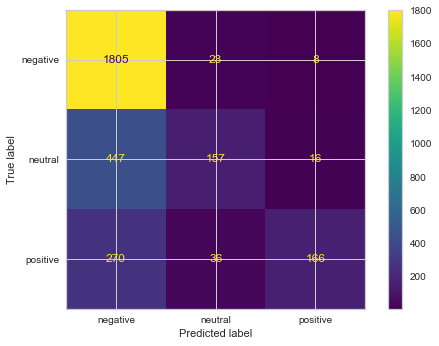

In [65]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

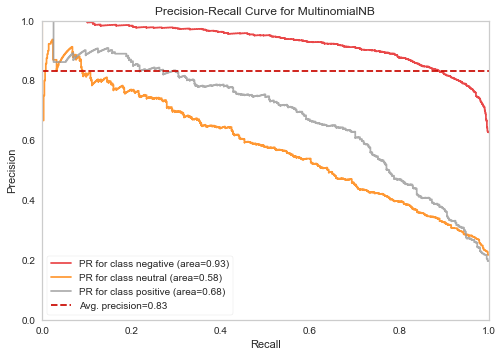

In [66]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [67]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_AP_neg = viz.score_["negative"]

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1836
     neutral       0.71      0.39      0.51       620
    positive       0.84      0.57      0.68       472

    accuracy                           0.78      2928
   macro avg       0.78      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.98      0.88      7342
     neutral       0.82      0.51      0.63      2479
    positive       0.88      0.60      0.71      1891

    accuracy                           0.82     11712
   macro avg       0.84      0.69      0.74     11712
weighted avg       0.82      0.82      0.80     11712



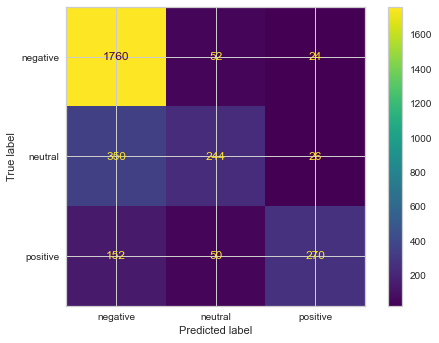

In [69]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

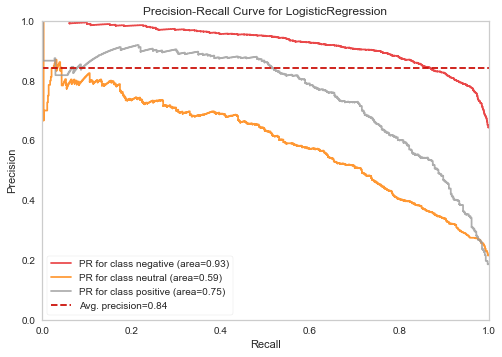

In [70]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [71]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = viz.score_["negative"]

In [72]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.89      0.78      0.83      1836
     neutral       0.53      0.69      0.60       620
    positive       0.67      0.75      0.71       472

    accuracy                           0.75      2928
   macro avg       0.70      0.74      0.71      2928
weighted avg       0.78      0.75      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7342
     neutral       0.62      0.81      0.70      2479
    positive       0.76      0.86      0.80      1891

    accuracy                           0.82     11712
   macro avg       0.77      0.83      0.79     11712
weighted avg       0.84      0.82      0.82     11712



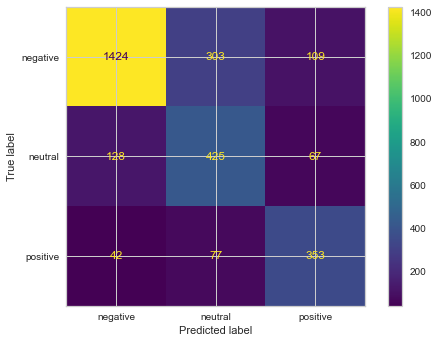

In [73]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

## SVM

In [74]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.87      1836
     neutral       0.72      0.40      0.52       620
    positive       0.81      0.62      0.71       472

    accuracy                           0.79      2928
   macro avg       0.78      0.66      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.98      0.90      7342
     neutral       0.84      0.54      0.66      2479
    positive       0.88      0.67      0.76      1891

    accuracy                           0.84     11712
   macro avg       0.85      0.73      0.77     11712
weighted avg       0.84      0.84      0.82     11712



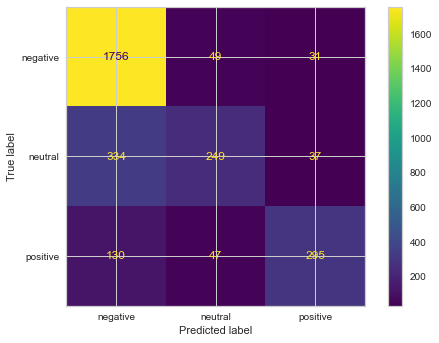

In [75]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

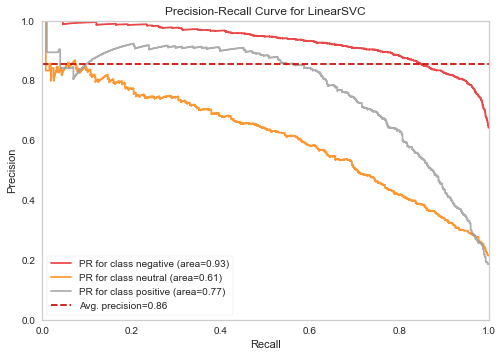

In [76]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [77]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = viz.score_["negative"]

## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

KNN MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.72      0.13      0.22      1836
     neutral       0.22      0.87      0.35       620
    positive       0.65      0.16      0.25       472

    accuracy                           0.29      2928
   macro avg       0.53      0.38      0.27      2928
weighted avg       0.61      0.29      0.25      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.88      0.28      0.42      7342
     neutral       0.26      0.92      0.41      2479
    positive       0.80      0.24      0.37      1891

    accuracy                           0.41     11712
   macro avg       0.64      0.48      0.40     11712
weighted avg       0.73      0.41      0.41     11712



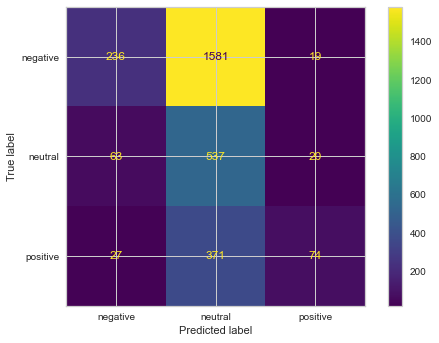

In [79]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

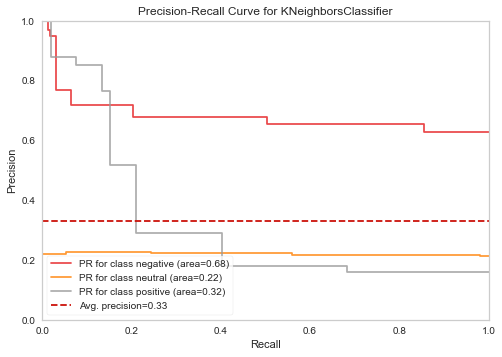

In [80]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_AP_neg = viz.score_["negative"]

## RandomForest

In [82]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.99      0.82      1836
     neutral       0.82      0.10      0.18       620
    positive       0.82      0.42      0.56       472

    accuracy                           0.71      2928
   macro avg       0.78      0.50      0.52      2928
weighted avg       0.74      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      1.00      0.84      7342
     neutral       0.97      0.19      0.32      2479
    positive       0.94      0.53      0.68      1891

    accuracy                           0.75     11712
   macro avg       0.88      0.58      0.61     11712
weighted avg       0.81      0.75      0.70     11712



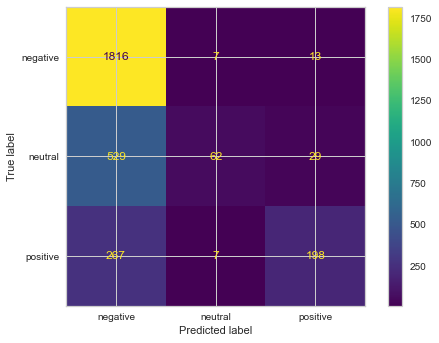

In [83]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

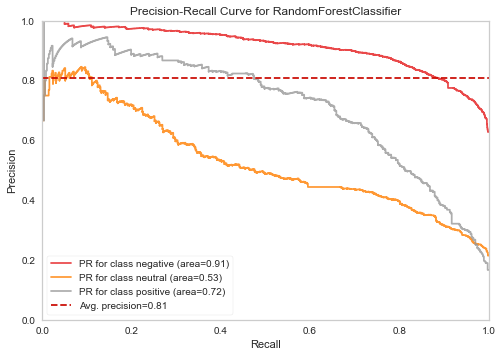

In [84]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [85]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = viz.score_["negative"]

In [86]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
Test_Set
              precision    recall  f1-score   support

    negative       0.89      0.71      0.79      1836
     neutral       0.44      0.70      0.54       620
    positive       0.66      0.67      0.67       472

    accuracy                           0.70      2928
   macro avg       0.66      0.69      0.67      2928
weighted avg       0.76      0.70      0.72      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.74      0.83      7342
     neutral       0.51      0.83      0.63      2479
    positive       0.73      0.72      0.73      1891

    accuracy                           0.76     11712
   macro avg       0.73      0.76      0.73     11712
weighted avg       0.81      0.76      0.77     11712



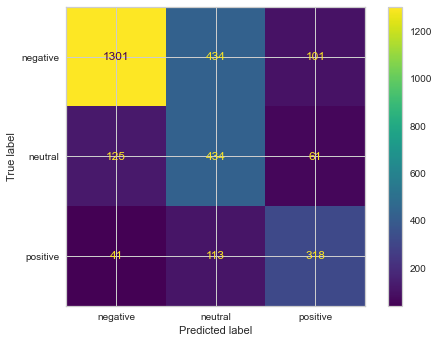

In [87]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

## Ada Boost

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      1836
     neutral       0.50      0.50      0.50       620
    positive       0.69      0.63      0.66       472

    accuracy                           0.73      2928
   macro avg       0.67      0.66      0.66      2928
weighted avg       0.73      0.73      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      7342
     neutral       0.60      0.59      0.59      2479
    positive       0.83      0.72      0.77      1891

    accuracy                           0.79     11712
   macro avg       0.76      0.73      0.74     11712
weighted avg       0.79      0.79      0.79     11712



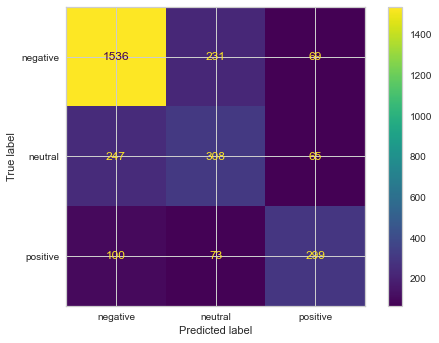

In [89]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

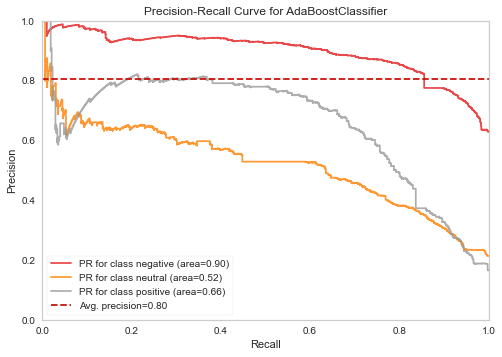

In [90]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [91]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_AP_neg = viz.score_["negative"]

## Compare Scoring

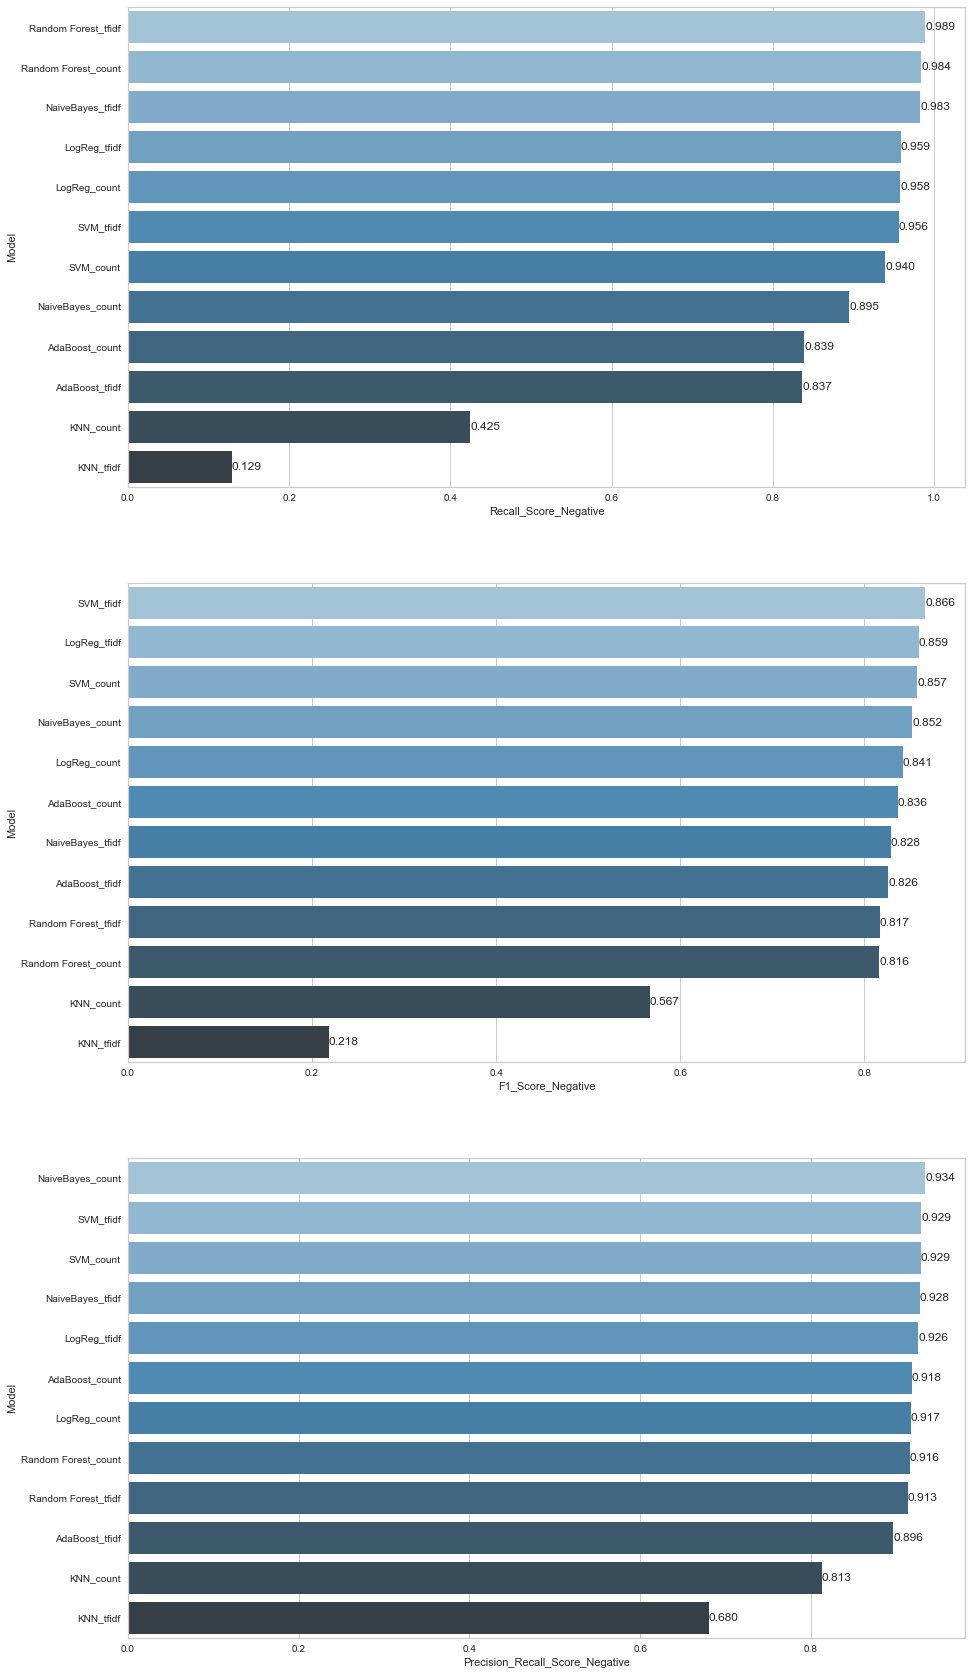

In [92]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## Cross Val

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
                 'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
                 'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"]),
                 
                 'precision-neutral': make_scorer(precision_score, average=None, labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average=None, labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average=None, labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average=None, labels=["positive"]),
                 'recall-pos': make_scorer(recall_score, average=None, labels = ["positive"]),
                 'f1-pos': make_scorer(f1_score, average=None, labels = ["positive"]),
                 }

for i, j  in custom_scorer.items():
    model = LogisticRegression(C=0.4, max_iter=1000)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j, n_jobs = -1).mean()
    print(f" {i:20} score : {scores}\n")

 accuracy             score : 0.7657940909872546

 precision-neg        score : 0.7646886077548902

 recall-neg           score : 0.9651320691764443

 f1-neg               score : 0.8532862805953954

 precision-neutral    score : 0.7153862569705784

 recall-neutral       score : 0.37554688520308216

 f1-neutral           score : 0.4922659145382327

 precision-pos        score : 0.8341404939210522

 recall-pos           score : 0.5034391534391535

 f1-pos               score : 0.6273869306245993



LOG MODEL
Test_Set
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      1836
     neutral       0.71      0.39      0.51       620
    positive       0.84      0.57      0.68       472

    accuracy                           0.78      2928
   macro avg       0.78      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.80      0.98      0.88      7342
     neutral       0.82      0.51      0.63      2479
    positive       0.88      0.60      0.71      1891

    accuracy                           0.82     11712
   macro avg       0.84      0.69      0.74     11712
weighted avg       0.82      0.82      0.80     11712



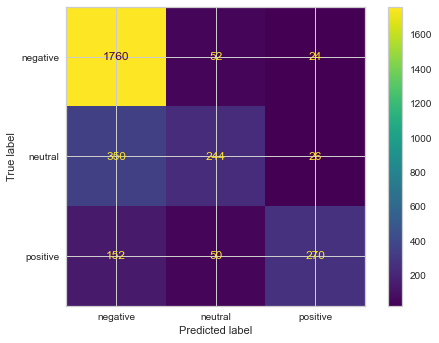

In [94]:
log = LogisticRegression(C=0.4, max_iter=1000).fit(X_train_tf_idf, y_train)
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

## For New Tweets, prediction with pipeline


In [95]:
from sklearn.pipeline import Pipeline

In [96]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression(C=0.4, max_iter=1000))])

In [97]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

In [98]:
tweet = "it was not the worst flight i have ever been"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [132]:
tweet = "didn't enjoy flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [190]:
tweet = "dont love"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)

array(['positive'], dtype=object)

## WordCloud - Repetition of Words

## Collect Words

In [101]:
tweets = df2["text"]
tweets

0                                                     said
1                   plus youve added commercial experience
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [102]:
all_words = " ".join(tweets)

In [103]:
all_words[:100]

'said plus youve added commercial experience didnt today must mean need take another trip really aggr'

## Create Word Cloud

In [133]:
from wordcloud import WordCloud

In [134]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [135]:
worldcloud.generate(all_words)

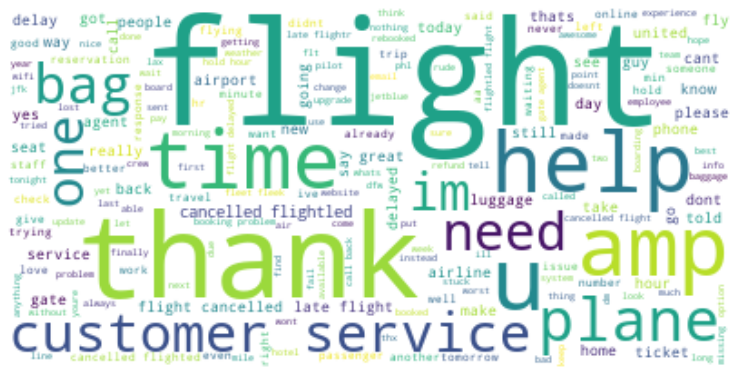

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

## Counting words

In [137]:
counter = Counter(word_tokenize(all_words))

In [152]:
counter.most_common()

[('flight', 4544),
 ('get', 1374),
 ('http', 1210),
 ('hour', 1138),
 ('thanks', 1078),
 ('cancelled', 1056),
 ('u', 994),
 ('service', 989),
 ('time', 946),
 ('customer', 934),
 ('help', 869),
 ('bag', 766),
 ('im', 743),
 ('plane', 725),
 ('amp', 683),
 ('hold', 642),
 ('need', 633),
 ('thank', 602),
 ('still', 580),
 ('one', 580),
 ('cant', 577),
 ('please', 564),
 ('call', 561),
 ('airline', 555),
 ('would', 549),
 ('day', 549),
 ('gate', 541),
 ('delayed', 537),
 ('back', 525),
 ('flightled', 506),
 ('dont', 490),
 ('seat', 480),
 ('got', 480),
 ('phone', 453),
 ('delay', 439),
 ('like', 432),
 ('today', 427),
 ('late', 426),
 ('guy', 423),
 ('agent', 416),
 ('know', 381),
 ('fly', 380),
 ('ticket', 380),
 ('make', 375),
 ('waiting', 368),
 ('airport', 367),
 ('change', 360),
 ('way', 358),
 ('trying', 348),
 ('minute', 345),
 ('go', 336),
 ('great', 335),
 ('ive', 328),
 ('wait', 325),
 ('going', 324),
 ('never', 319),
 ('problem', 313),
 ('flying', 312),
 ('min', 309),
 ('tomorr

In [155]:
for i in counter.most_common():
    if "enjoy" == i[0]:
        print(i)

('enjoy', 21)


In [156]:
for i in counter.most_common():
    if "love" == i[0]:
        print(i)

('love', 247)


In [157]:
for i in counter.most_common():
    if "like" == i[0]:
        print(i)

('like', 432)


In [186]:
counter = 0
for i,j in enumerate(X):
    if "love" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)      

5


In [184]:
counter = 0
for i,j in enumerate(X):
    if "like" in j and "dont" in j and y[i]=="negative":
        counter += 1
print(counter)

30


In [185]:
counter = 0
for i,j in enumerate(X):
    if "like" in j and "didnt" in j and y[i]=="negative":
        counter += 1
print(counter)

4


In [172]:
counter = 0
for i,j in enumerate(X):
    if "love" in j and y[i]=="neutral":
        counter += 1
print(counter)

53
